# Data Analysis

### Import Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import soundfile as sf

### Loading Data
Currently, I will be using ASVspoof 2019 dataset which is a dataset containing real (bonafide) and fake (spoofed) speech generated from a variety of methods. 

In [5]:
data_path = '../../data/ASVspoof_Dataset/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
df = pd.read_csv(data_path, delimiter=" ", names=["SPEAKER_ID", "AUDIO_FILE_NAME", "SYSTEM_ID", "-", "KEY"])
df.head(10)

,SPEAKER_ID,AUDIO_FILE_NAME,SYSTEM_ID,-,KEY
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide
5,LA_0079,LA_T_1363611,-,-,bonafide
6,LA_0079,LA_T_1596451,-,-,bonafide
7,LA_0079,LA_T_1608170,-,-,bonafide
8,LA_0079,LA_T_1684951,-,-,bonafide
9,LA_0079,LA_T_1699801,-,-,bonafide


### Analysis
We can see that there are significantly less bonafide audio files than spoofed files.

In [3]:
df['KEY'].value_counts()

KEY
spoof       22800
bonafide     2580
Name: count, dtype: int64

### Sample of the Audio

In [4]:
train_files = '../../data/ASVspoof_Dataset/ASVspoof2019_LA_train/flac/'
bonafide_file_path = train_files + df[df['KEY'] == 'bonafide'].at[0, 'AUDIO_FILE_NAME'] + ".flac"
spoof_file_path = train_files + df[df['KEY'] == 'spoof'].at[2580, 'AUDIO_FILE_NAME'] + ".flac"

audio_data, sample_rate = sf.read(bonafide_file_path)
print("Bonafide (Real) Audio:")
display(Audio(audio_data, rate=sample_rate))

audio_data, sample_rate = sf.read(spoof_file_path)
print("Spoof (Fake) Audio:")
display(Audio(audio_data, rate=sample_rate))


Bonafide (Real) Audio:


Spoof (Fake) Audio:


### Extracting MFCC Features
MFCC stands for *Mel Frequency Cepstral Coefficents* which is a way of representing sound, especially speech.

In [4]:
train_files = '../../data/ASVspoof_Dataset/ASVspoof2019_LA_train/flac/'

def plot_mfcc(file_name, title='Mel-frequency spectrogram'):
    file_path =  train_files + file_name + ".flac"
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=title)

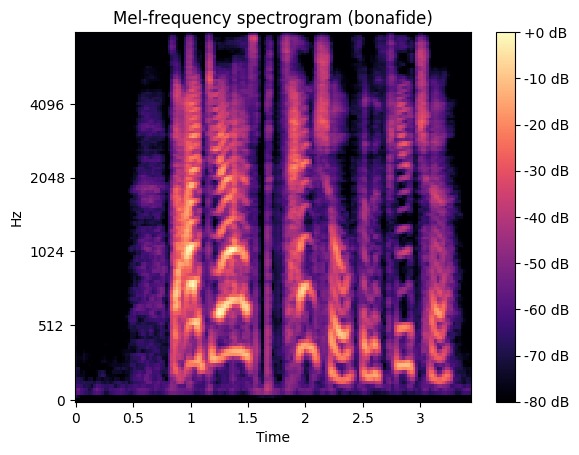

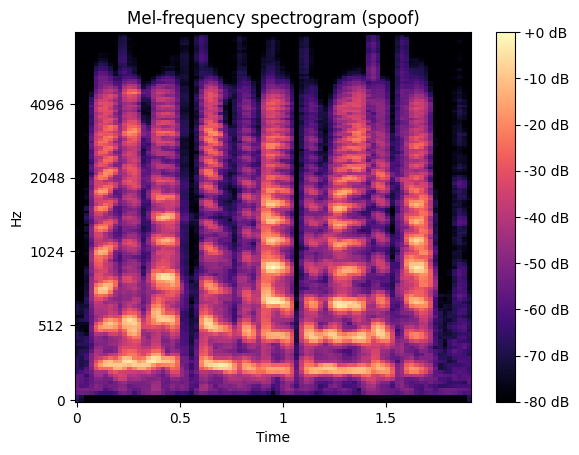

In [ ]:
plot_mfcc("LA_T_1138215", "Mel-Frequency Spectrogram (bonafide)") #TODO: Add subplots
plot_mfcc("LA_T_1004644", "Mel-Frequency Spectrogram (spoof)")